In [1]:
%matplotlib nbagg

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage
import matplotlib as mpl
import os

In [10]:
os.listdir("./")

['steel.jpg', '.ipynb_checkpoints', 'image_processing.ipynb']

In [32]:
im = io.imread("steel.jpg")
im = im[58:, :, 0] # Crop
im.shape

(400, 600)

In [33]:
#im[:, :, 0] - im[:, :, 1]

<IPython.core.display.Javascript object>


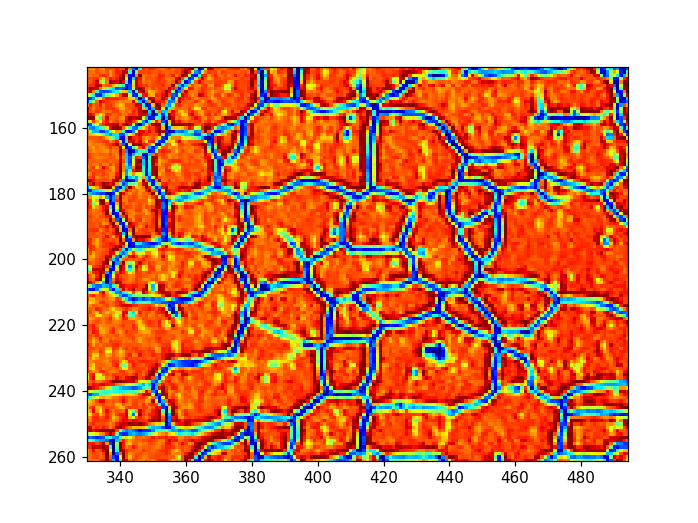

In [36]:
fig = plt.figure()
plt.imshow(im, cmap = mpl.cm.jet)
plt.show()

## Histogram

<IPython.core.display.Javascript object>


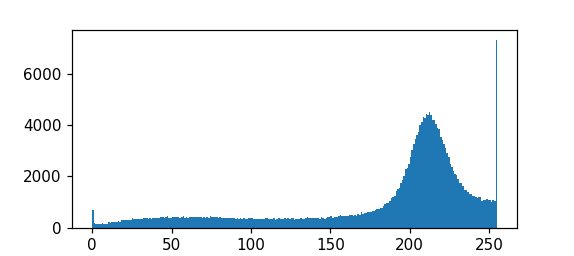

In [38]:
plt.figure()
plt.hist(im.flatten(), bins = 255)
plt.show()

## Thresholding

In [104]:
imt = (im > 175)*1 # Pixels > 100 => 1, else 0
imt

imt2 = ndimage.binary_erosion(imt, structure = np.ones((3,3)))


<IPython.core.display.Javascript object>


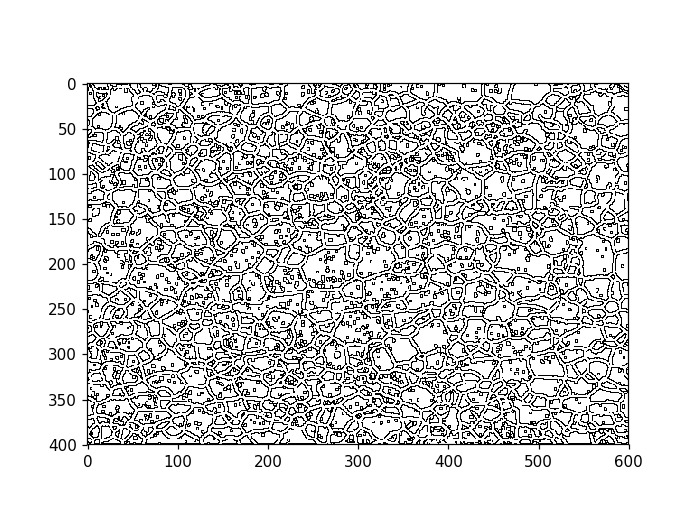

In [105]:
plt.figure()
plt.imshow(imt2 - imt, cmap = mpl.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


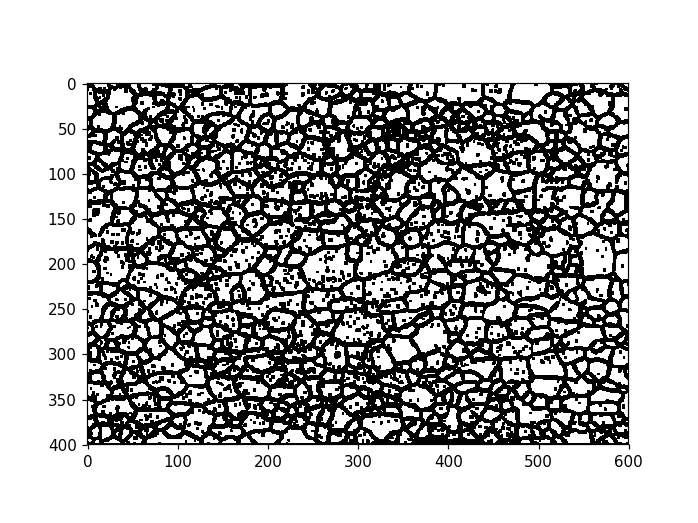

In [106]:
plt.figure()
plt.imshow(imt2, cmap = mpl.cm.gray)
plt.show()

## Labelization

In [107]:
iml, number = ndimage.label(imt2)
number

1009

In [109]:
plt.figure()
plt.imshow(np.where(iml == 0, np.nan, iml), # 0 are hidden
           cmap = plt.cm.prism)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

In [112]:
grain_size = np.bincount(iml.flatten()) # Count each grain
grain_size[1:].max()

1391

In [114]:
np.where(grain_size == 1391)

(array([486]),)

<IPython.core.display.Javascript object>


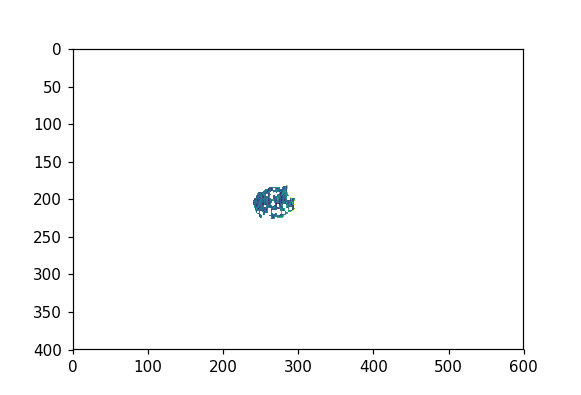

In [116]:
plt.figure()
plt.imshow( np.where( iml == 486, im, np.nan ) ) 
plt.show()